# 2-1: 데이터 정제 결과 확인
정제 전후 비교 및 이상치 처리 결과 시각화

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

# 정제 전 데이터
hourly_raw = pd.read_csv('../data/filtered/hourly_boarding_606_420.csv')
daily_raw = pd.read_csv('../data/filtered/daily_boarding_606_420.csv')
weather_raw = pd.read_csv('../data/raw/weather_hourly.csv', encoding='cp949')

# 정제 후 데이터
hourly_clean = pd.read_csv('../data/processed/hourly_boarding_clean.csv')
daily_clean = pd.read_csv('../data/processed/daily_boarding_clean.csv')
weather_clean = pd.read_csv('../data/processed/weather_clean.csv')

print('데이터 로드 완료')

데이터 로드 완료


## 1. 시간대별 승하차 데이터 — 이상치 처리 전후 비교

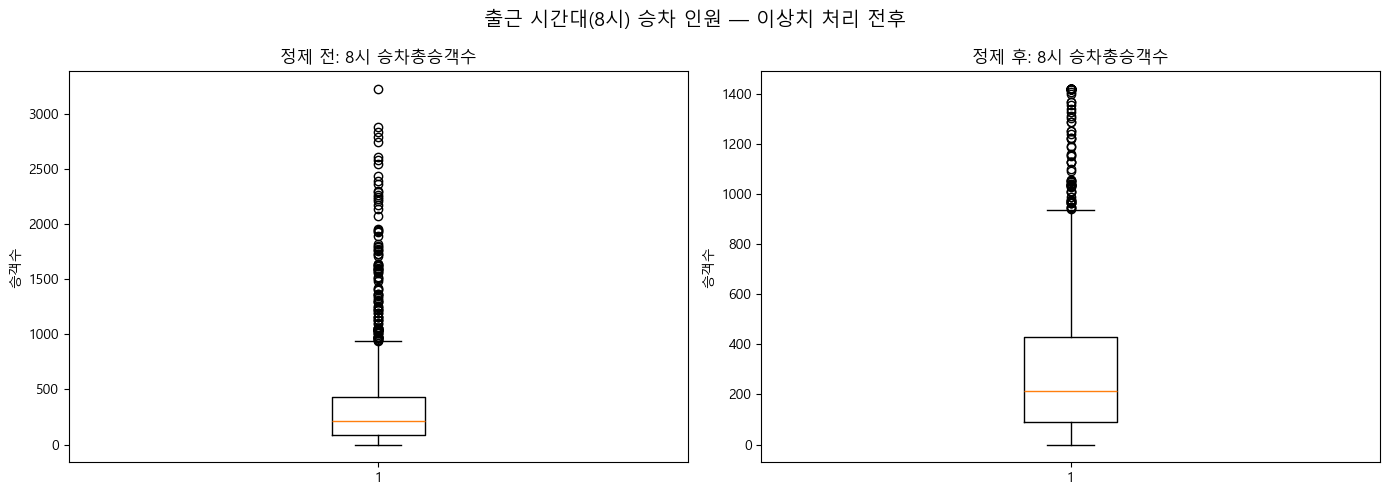

In [2]:
# 8시 승차 (출근 시간대) 비교
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].boxplot(hourly_raw['8시승차총승객수'].dropna(), vert=True)
axes[0].set_title('정제 전: 8시 승차총승객수')
axes[0].set_ylabel('승객수')

axes[1].boxplot(hourly_clean['8시승차총승객수'].dropna(), vert=True)
axes[1].set_title('정제 후: 8시 승차총승객수')
axes[1].set_ylabel('승객수')

plt.suptitle('출근 시간대(8시) 승차 인원 — 이상치 처리 전후', fontsize=14)
plt.tight_layout()
plt.show()

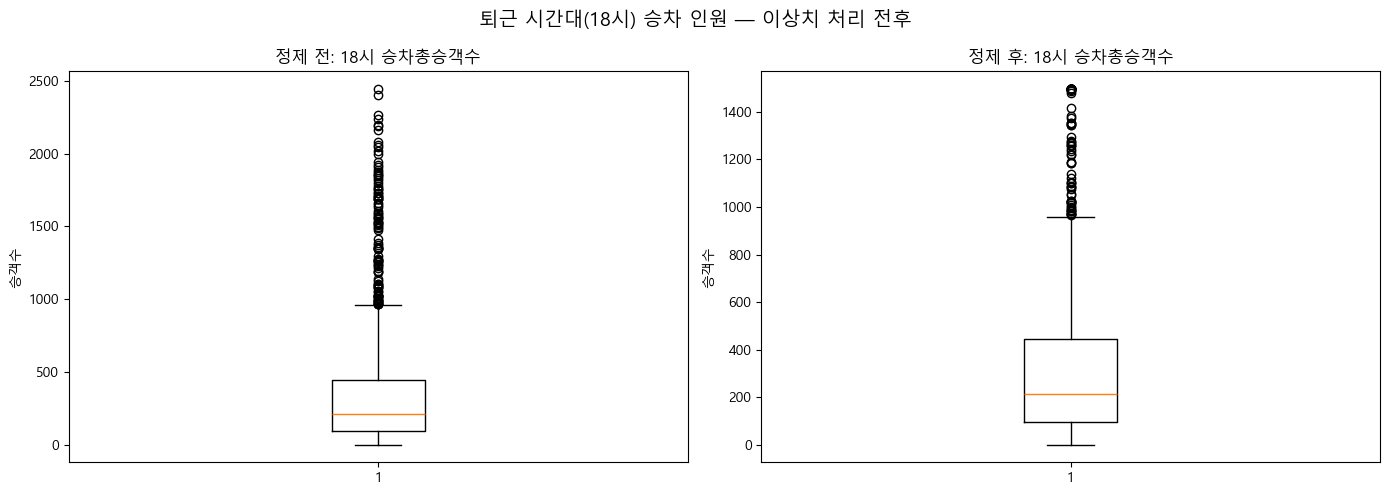

In [3]:
# 18시 승차 (퇴근 시간대) 비교
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].boxplot(hourly_raw['18시승차총승객수'].dropna(), vert=True)
axes[0].set_title('정제 전: 18시 승차총승객수')
axes[0].set_ylabel('승객수')

axes[1].boxplot(hourly_clean['18시승차총승객수'].dropna(), vert=True)
axes[1].set_title('정제 후: 18시 승차총승객수')
axes[1].set_ylabel('승객수')

plt.suptitle('퇴근 시간대(18시) 승차 인원 — 이상치 처리 전후', fontsize=14)
plt.tight_layout()
plt.show()

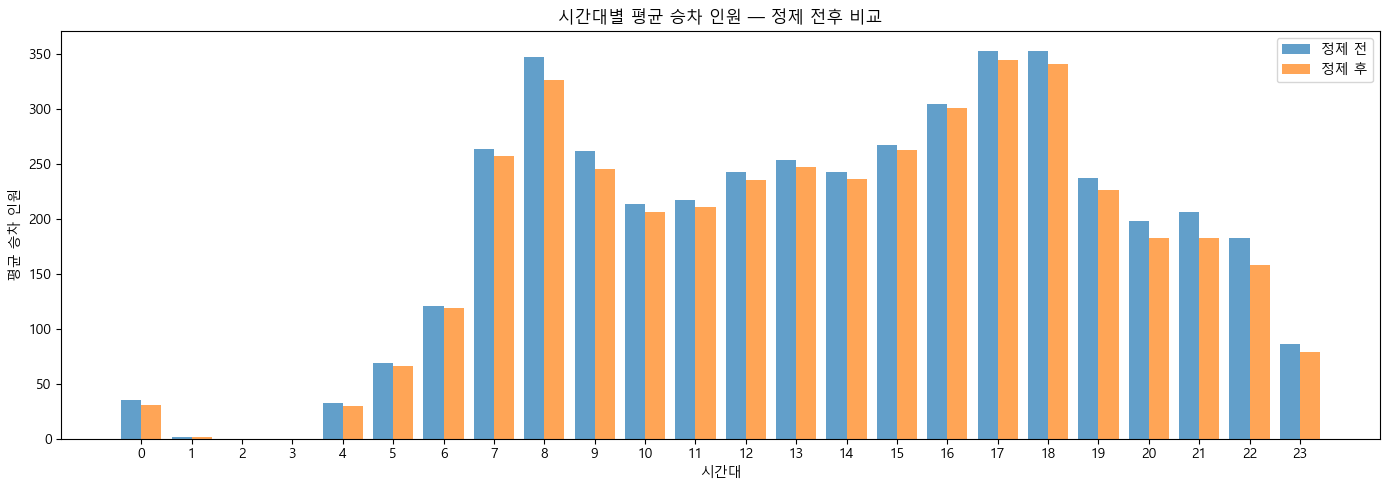

In [4]:
# 시간대별 평균 승차 인원 분포 (정제 전후)
board_cols = ['00시승차총승객수'] + [f'{h}시승차총승객수' for h in range(1, 24)]
hourly_mean_raw = hourly_raw[board_cols].mean()
hourly_mean_clean = hourly_clean[board_cols].mean()

fig, ax = plt.subplots(figsize=(14, 5))
x = range(24)
ax.bar([i - 0.2 for i in x], hourly_mean_raw.values, width=0.4, label='정제 전', alpha=0.7)
ax.bar([i + 0.2 for i in x], hourly_mean_clean.values, width=0.4, label='정제 후', alpha=0.7)
ax.set_xlabel('시간대')
ax.set_ylabel('평균 승차 인원')
ax.set_title('시간대별 평균 승차 인원 — 정제 전후 비교')
ax.set_xticks(range(24))
ax.legend()
plt.tight_layout()
plt.show()

## 2. 일별 승하차 데이터 — 이상치 처리 전후 비교

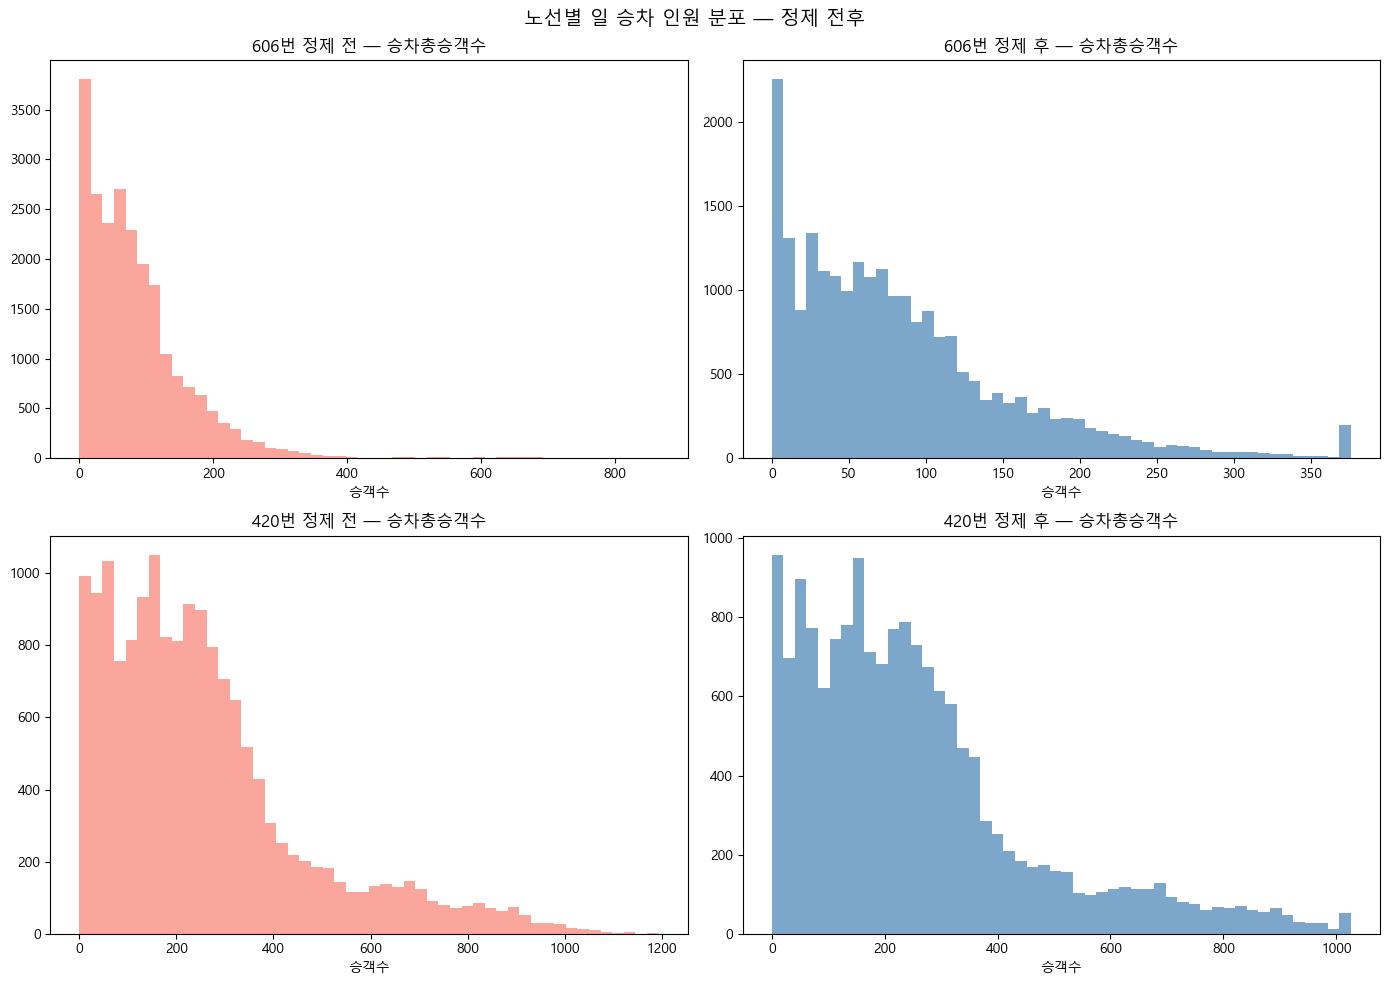

In [5]:
# 노선별 승차 분포 비교
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, route in enumerate(['606', '420']):
    raw_route = daily_raw[daily_raw['노선번호'].astype(str) == route]['승차총승객수']
    clean_route = daily_clean[daily_clean['노선번호'].astype(str) == route]['승차총승객수']
    
    axes[i][0].hist(raw_route, bins=50, alpha=0.7, color='salmon')
    axes[i][0].set_title(f'{route}번 정제 전 — 승차총승객수')
    axes[i][0].set_xlabel('승객수')
    
    axes[i][1].hist(clean_route, bins=50, alpha=0.7, color='steelblue')
    axes[i][1].set_title(f'{route}번 정제 후 — 승차총승객수')
    axes[i][1].set_xlabel('승객수')

plt.suptitle('노선별 일 승차 인원 분포 — 정제 전후', fontsize=14)
plt.tight_layout()
plt.show()

In [6]:
# 정제 전후 기술 통계 비교
print('=== 정제 전 ===')
print(daily_raw[['승차총승객수', '하차총승객수']].describe().round(1))
print()
print('=== 정제 후 ===')
print(daily_clean[['승차총승객수', '하차총승객수']].describe().round(1))

=== 정제 전 ===
        승차총승객수   하차총승객수
count  39002.0  39002.0
mean     157.3    153.6
std      171.0    148.3
min        0.0      0.0
25%       45.0     55.0
50%      102.0    106.0
75%      210.0    200.0
max     1193.0   1007.0

=== 정제 후 ===
        승차총승객수   하차총승객수
count  39002.0  39002.0
mean     156.4    153.4
std      169.1    147.9
min        0.0      0.0
25%       45.0     55.0
50%      102.0    106.0
75%      210.0    200.0
max     1026.0    986.0


## 3. 날씨 데이터 — 결측치 처리 결과

In [7]:
# 결측치 현황 비교
print('=== 정제 전 결측치 ===')
print(weather_raw[['기온(°C)', '강수량(mm)', '풍속(m/s)', '적설(cm)']].isnull().sum())
print()
print('=== 정제 후 결측치 ===')
print(weather_clean.isnull().sum())

=== 정제 전 결측치 ===
기온(°C)        0
강수량(mm)    3856
풍속(m/s)       0
적설(cm)     4232
dtype: int64

=== 정제 후 결측치 ===
datetime         0
temperature      0
precipitation    0
wind_speed       0
snow             0
dtype: int64


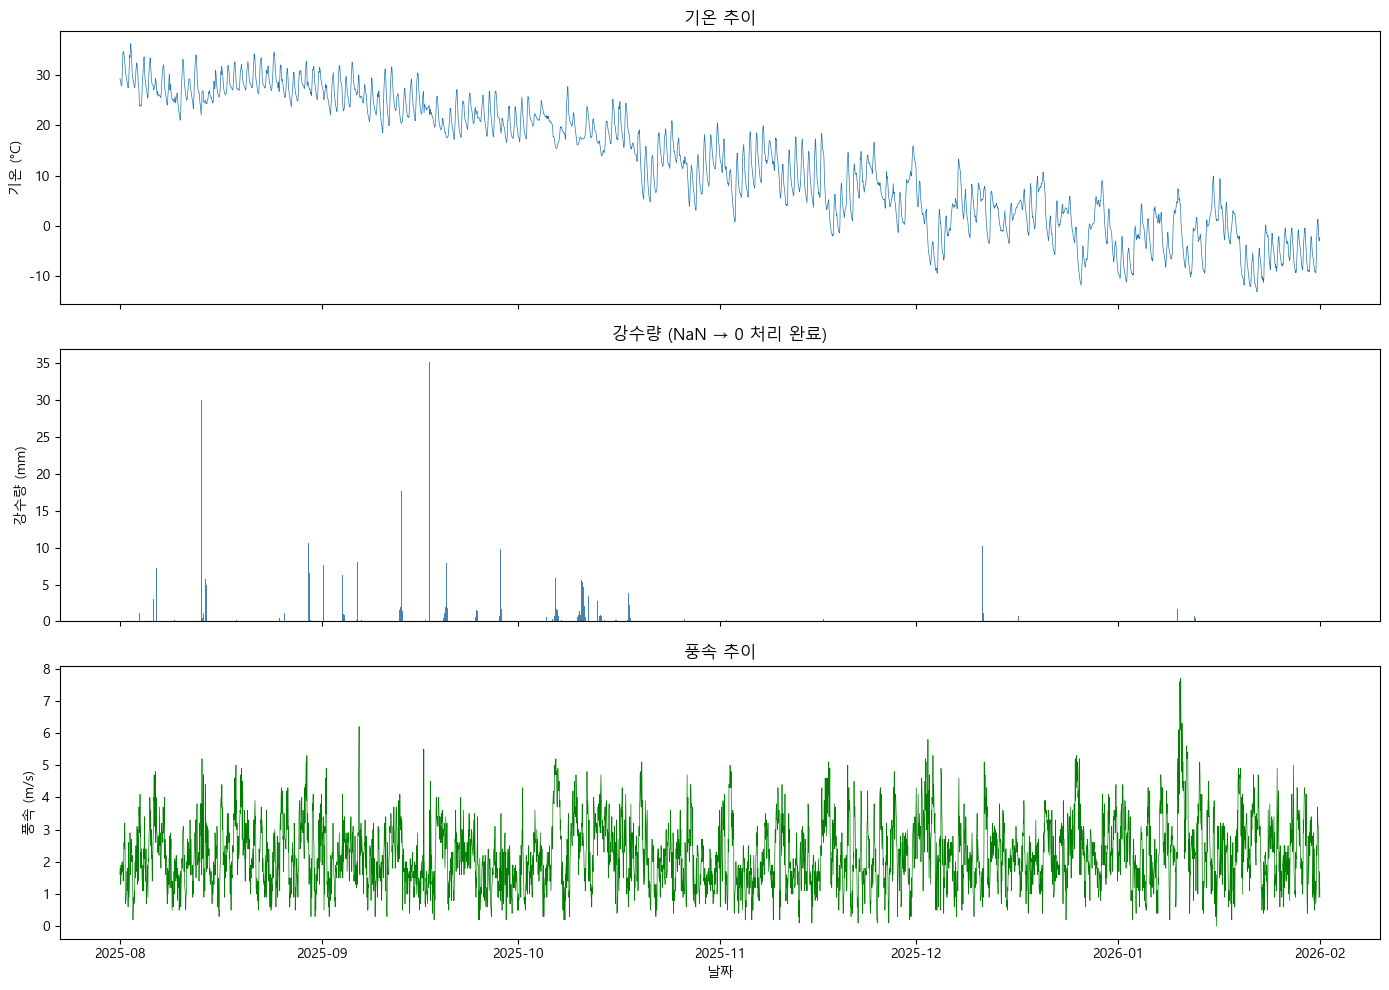

In [8]:
# 날씨 데이터 시각화
weather_clean['datetime'] = pd.to_datetime(weather_clean['datetime'])

fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

axes[0].plot(weather_clean['datetime'], weather_clean['temperature'], linewidth=0.5)
axes[0].set_ylabel('기온 (°C)')
axes[0].set_title('기온 추이')

axes[1].bar(weather_clean['datetime'], weather_clean['precipitation'], width=0.04, color='steelblue')
axes[1].set_ylabel('강수량 (mm)')
axes[1].set_title('강수량 (NaN → 0 처리 완료)')

axes[2].plot(weather_clean['datetime'], weather_clean['wind_speed'], linewidth=0.5, color='green')
axes[2].set_ylabel('풍속 (m/s)')
axes[2].set_title('풍속 추이')

plt.xlabel('날짜')
plt.tight_layout()
plt.show()

## 4. 정제 결과 요약

In [9]:
summary = pd.DataFrame({
    '데이터': ['시간대별 승하차', '일별 승하차', '날씨'],
    '정제 전 shape': [str(hourly_raw.shape), str(daily_raw.shape), str(weather_raw.shape)],
    '정제 후 shape': [str(hourly_clean.shape), str(daily_clean.shape), str(weather_clean.shape)],
    '결측치 처리': ['없음', '없음', '강수량 3856개, 적설 4232개 → 0'],
    '이상치 처리': ['1321개 capping', '428개 노선별 capping', '범위 밖 값 보간']
})
summary

,데이터,정제 전 shape,정제 후 shape,결측치 처리,이상치 처리
0,시간대별 승하차,"(1366, 57)","(1366, 54)",없음,1321개 capping
1,일별 승하차,"(39002, 9)","(39002, 8)",없음,428개 노선별 capping
2,날씨,"(4416, 11)","(4416, 5)","강수량 3856개, 적설 4232개 → 0",범위 밖 값 보간
